In [67]:
#!pip install mlxtend 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets


# The Iris Dataset

This data sets consists of 3 different types of irises'
(Setosa, Versicolour, and Virginica) petal and sepal
length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being:
Sepal Length, Sepal Width, Petal Length	and Petal Width.

The below plot uses the first two features.
See `here <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ for more
information on this dataset.



In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data',header = None);df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


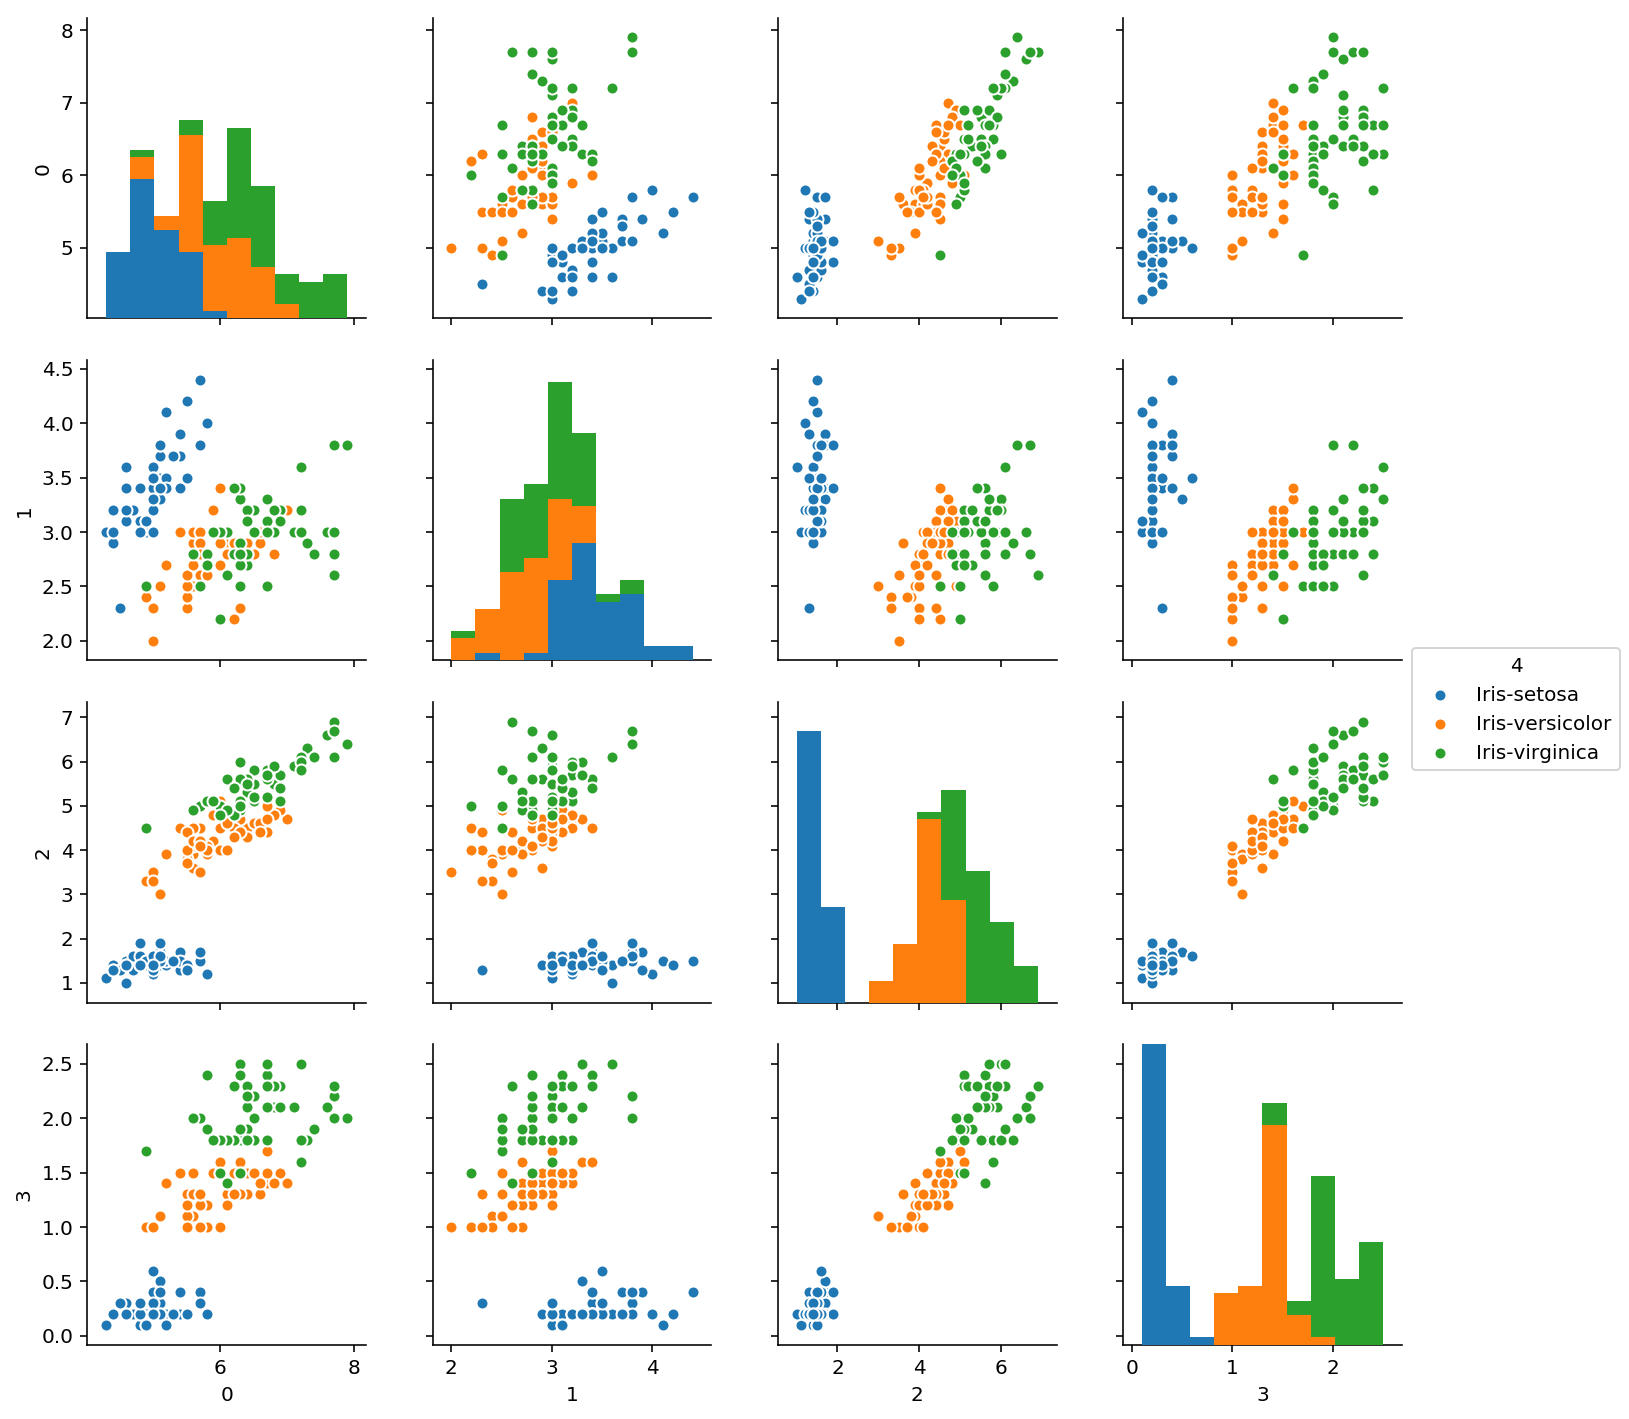

In [7]:
sns.pairplot(df, hue=4)
plt.show()

In [10]:
maps = {n:i for i, n in enumerate(df[4].unique())}
maps
df[5]=df[4].map(maps)
df.drop(4, axis = 1,inplace = True);df.head()

,0,1,2,3,5
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


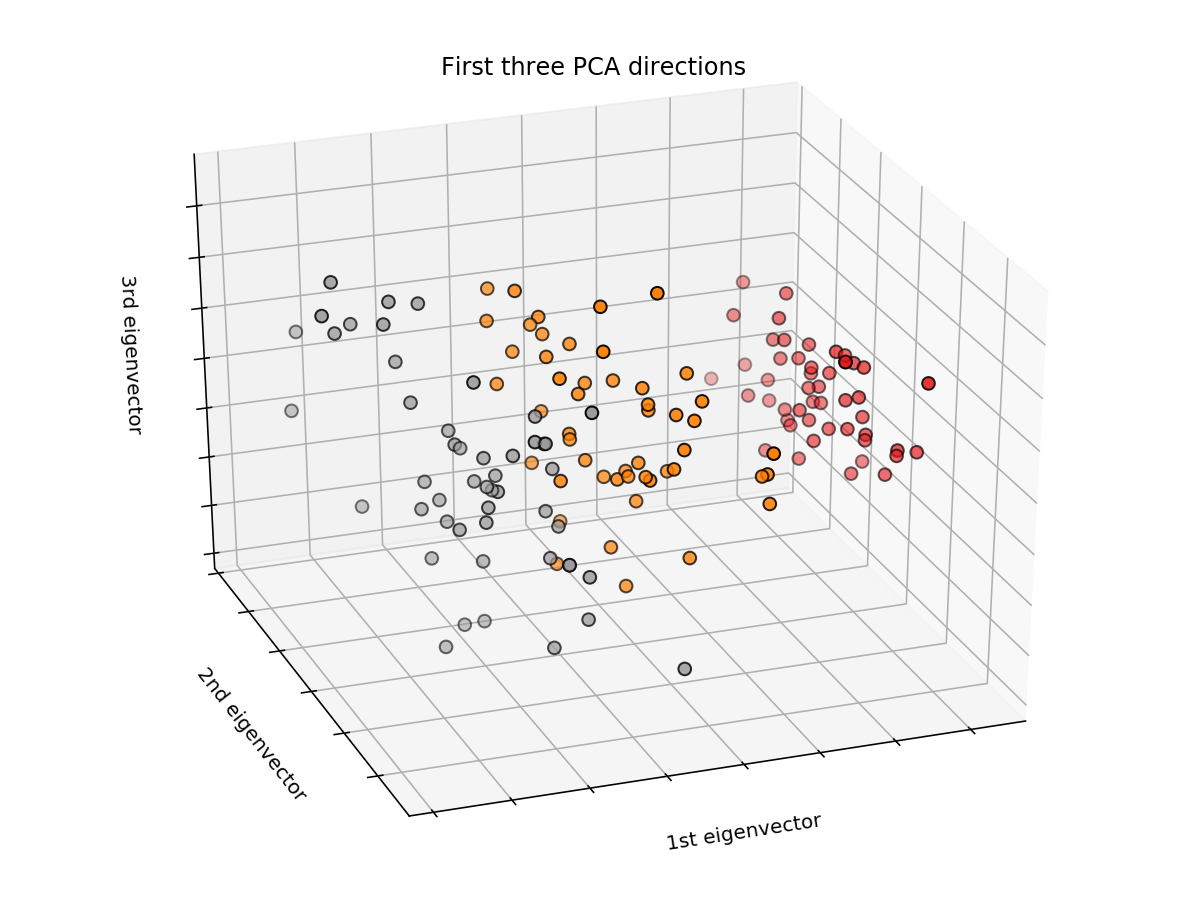

In [21]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df.iloc[:,:4])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [11]:
X = df.loc[:, [0,2]] 
y = df[5]

([], <a list of 0 Text yticklabel objects>)

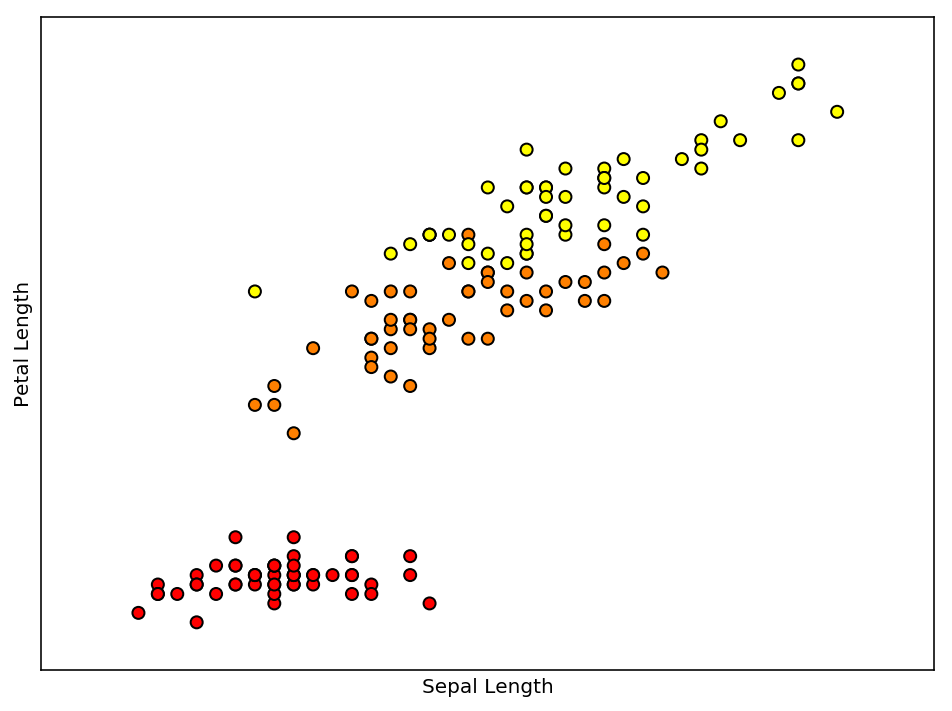

In [33]:
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()


plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, 
            edgecolor='k', cmap='autumn')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [13]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [74]:
model = SVC(kernel='linear', random_state=1, gamma=0.10, C=10.0)
model.fit(X_train_std, y_train)
model.score(X_train_std, y_train)

0.95238095238095233

In [75]:
y_pred = model.predict(X_test_std)
(y_test!=y_pred).sum()

1

In [76]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


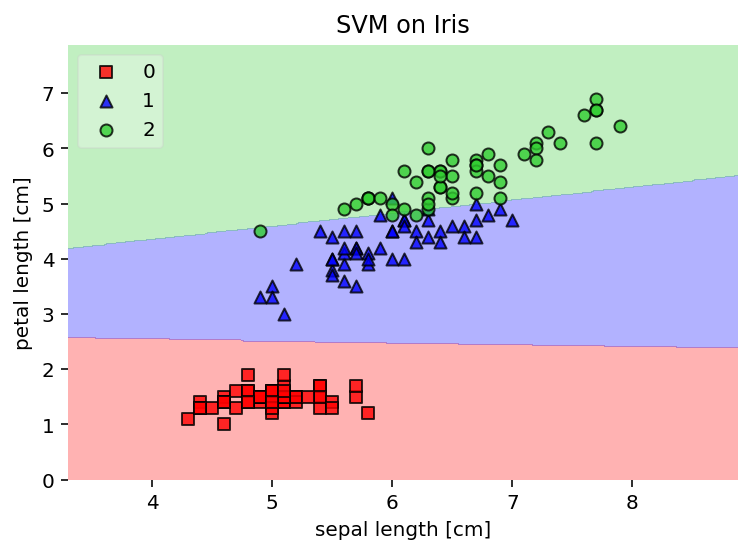

In [78]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

plot_decision_regions(X, y, clf=svm,
                      res=0.02, legend=2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()